In [62]:
import nltk
import re
import json
import pandas as pd
from nltk.util import ngrams
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [16]:
def load_json(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)  # This loads the list of combined strings

    # Split each entry into [submission, comments] by the separator
    processed = []
    for entry in data:
        if " [======>] " in entry:
            submission, comments = entry.split(" [======>] ", 1)
            processed.append([submission.strip(), comments.strip()])
        else:
            # Handle any malformed entry without the separator
            processed.append([entry.strip(), ""])

    return processed

In [17]:
def preprocess(text):
    text = text.lower()  # convert text to lower-case
    text = re.sub('&gt;', '', text) # remove some special characters from the data &gt; corresponds to >
    text = re.sub('&amp;', '', text) # remove some special characters from the data &amp; corresponds to &
    text = re.sub(r'\s+', ' ', text)  # eliminate duplicate whitespaces using regex
    text = re.sub(r'\[[^]]*\]', '', text)  # remove text in square brackets
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove punctuation (keep only characters and numbers)
    return text

In [51]:
def count_nta_yta(strings):
    results = []
    for text in strings:
        nta_count = len(re.findall(r'\bnta\b', text))
        yta_count = len(re.findall(r'\byta\b', text))
        results.append((nta_count, yta_count))
    return results

In [18]:
corpus = load_json("./data/output.json")

In [38]:
corpus_submissions = [x[0] for x in corpus]
corpus_comment = [x[1] for x in corpus]

KeyboardInterrupt: 

In [39]:
corpus_submissions = corpus_submissions[0:5000]
corpus_comment = corpus_comment[0:5000]

In [40]:
# run our function to preprocess all comments
preprocessed_comments = [preprocess(comment) for comment in corpus_comment]

In [55]:
nta_yta = count_nta_yta(preprocessed_comments)

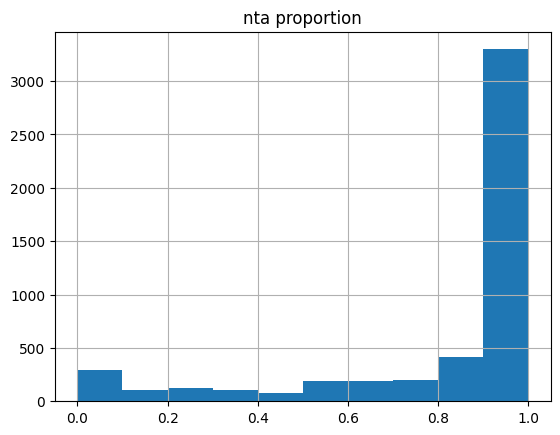

In [65]:
proportions_ratios = [p[0] / sum(p) if sum(p) != 0 else 0 for p in nta_yta]
plt.hist(proportions_ratios)
plt.title("nta proportion")
plt.grid()

In [ ]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
stop_words = set(stopwords.words('english'))

# Tokenize the comments and remove the stopwords
all_words_nta = [] # list of lists holding our dataset (each list corresponds to a comment and it includes the tokenized words)
for comment in preprocessed_comments:
    # tokenize the comments and remove stopwords
    all_words_nta.append([ w for w in word_tokenize(comment) if w not in stop_words])

In [ ]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
stop_words = set(stopwords.words('english'))

# Tokenize the comments and remove the stopwords that have nta proportion > 0.6
all_words_nta = [] # list of lists holding our dataset (each list corresponds to a comment and it includes the tokenized words)
for comment in range(len(preprocessed_comments)):
    if proportions_ratios[comment] >= 0.6:
        # tokenize the comments and remove stopwords
        all_words_nta.append([ w for w in word_tokenize(preprocessed_comments[comment]) if w not in stop_words])

In [ ]:
# calculate all ngrams for n=2, 3, and 4
all_bigrams = []
all_trigrams = []
all_fourgrams = []

# for each document
for doc in all_words_nta:
    # calculate all ngrams with size 2 (i.e., bigrams) and then store them in our list holding all bigrams
    all_bigrams.extend(list(ngrams(doc, 2)))
    all_trigrams.extend(list(ngrams(doc, 3)))
    all_fourgrams.extend(list(ngrams(doc, 4)))

In [69]:
# we use the Counter class from Collections to find the top N most occurring Ngrams in our dataset
top_bigrams = Counter(all_bigrams).most_common(10)
top_trigrams = Counter(all_trigrams).most_common(10)
top_fourgrams = Counter(all_fourgrams).most_common(10)

# lets present the most occurring Ngrams in a nice table using Pandas
top_bigrams_df = pd.DataFrame(top_bigrams, columns =['Bigram', '#']) # create DataFrame for bigrams
top_trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', '#']) # create DataFrame for trigrams
top_fourgrams_df = pd.DataFrame(top_fourgrams, columns=['Fourgram', '#']) # create DataFrame for fourgrams
ngrams_df = pd.concat([top_bigrams_df, top_trigrams_df, top_fourgrams_df], axis=1) # concatenate all to a single datafrme

print("The top 10 most popular ngrams in our dataset are...")
ngrams_df

The top 10 most popular ngrams in our dataset are...


,Bigram,#,Trigram,#,Fourgram,#
0,"(sounds, like)",15965,"(nta, sounds, like)",1998,"(comment, removed, violates, rule)",1736
1,"(nta, nta)",10683,"(comment, removed, violates)",1737,"(incidents, may, result, ban)",1732
2,"(dont, know)",6232,"(removed, violates, rule)",1736,"(may, result, ban, questions)",1732
3,"(im, sorry)",6074,"(incidents, may, result)",1732,"(result, ban, questions, concerns)",1732
4,"(dont, think)",5713,"(may, result, ban)",1732,"(removed, violates, rule, 1)",1729
5,"(dont, want)",5524,"(result, ban, questions)",1732,"(violates, rule, 1, incidents)",1729
6,"(make, sure)",4463,"(ban, questions, concerns)",1732,"(rule, 1, incidents, may)",1729
7,"(feel, like)",4284,"(violates, rule, 1)",1729,"(1, incidents, may, result)",1729
8,"(im, sure)",4156,"(rule, 1, incidents)",1729,"(ban, questions, concerns, nta)",545
9,"(year, old)",4074,"(1, incidents, may)",1729,"(play, stupid, games, win)",201
